# Problem 6

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import stan
import arviz as az

import nest_asyncio
nest_asyncio.apply()

In [2]:
# Load data
sample_response_times = np.loadtxt('sample_response_times.csv', delimiter=';', skiprows=1)

# Prepare data for Stan
data_dict = {
    'N': sample_response_times.shape[0],
    'y': sample_response_times[:, 0],
    'choice': sample_response_times[:, 1].astype(int),
    'condition': sample_response_times[:, 2].astype(int),
}

## Compiling and Running Stan Code
### Choice of varied parameter
We chose the drift rate, $v$, as our parameter to vary between each condition. From our notes, drift rate is the "average rate of continuous information uptake (evidence) in favor of one
alternative." In other words, it describes how fast information is acquired in the direction of a choice. A higher drift rate will correspond to an easier task, while a lower drift rate will correspond to a harder one.

In [8]:
# Compile Stan model
program_code = open('diffusion_model.stan').read()
model = stan.build(program_code, data_dict)

Building...



Building: found in cache, done.

## Results and Interpretation

In [4]:
# Posterior inference using MCMC
fit = model.sample(num_chains=4, num_warmup=1000, num_samples=2000)

Sampling:   0%
Sampling:   0% (1/12000)
Sampling:   0% (2/12000)
Sampling:   0% (3/12000)
Sampling:   0% (4/12000)
Sampling:   1% (103/12000)
Sampling:   2% (202/12000)
Sampling:   3% (301/12000)
Sampling:   3% (401/12000)
Sampling:   4% (501/12000)
Sampling:   5% (601/12000)
Sampling:   6% (701/12000)
Sampling:   7% (801/12000)
Sampling:   8% (901/12000)
Sampling:   9% (1101/12000)
Sampling:  10% (1201/12000)
Sampling:  11% (1301/12000)
Sampling:  12% (1401/12000)
Sampling:  13% (1601/12000)
Sampling:  14% (1701/12000)
Sampling:  15% (1801/12000)
Sampling:  16% (1901/12000)
Sampling:  18% (2101/12000)
Sampling:  19% (2301/12000)
Sampling:  20% (2400/12000)
Sampling:  21% (2500/12000)
Sampling:  22% (2600/12000)
Sampling:  23% (2701/12000)
Sampling:  23% (2801/12000)
Sampling:  26% (3102/12000)
Sampling:  28% (3302/12000)
Sampling:  30% (3601/12000)
Sampling:  33% (3901/12000)
Sampling:  34% (4100/12000)
Sampling:  36% (4300/12000)
Sampling:  37% (4400/12000)
Sampling:  38% (4500/12000

In [6]:
# Posterior summary statistics
az.summary(fit)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
v_1,2.649,0.260,2.155,3.130,0.004,0.003,5327.0,4852.0,1.0
v_2,0.513,0.183,0.187,0.866,0.002,0.002,5204.0,3426.0,1.0
a,0.851,0.027,0.801,0.900,0.000,0.000,4868.0,5558.0,1.0
tau,0.397,0.003,0.391,0.402,0.000,0.000,4736.0,4525.0,1.0
beta,0.511,0.021,0.471,0.552,0.000,0.000,4821.0,4934.0,1.0


The resulting `r_hat` score for all parameters is 1.0, which indicates convergence. Both `ess_bulk` and `ess_tail` are high, which indicates efficiency.

/home/carror/miniconda3/envs/cognitive/lib/python3.12/site-packages/arviz/plots/backends/matplotlib/traceplot.py:433: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  for chain_id in range(data.dims["chain"])


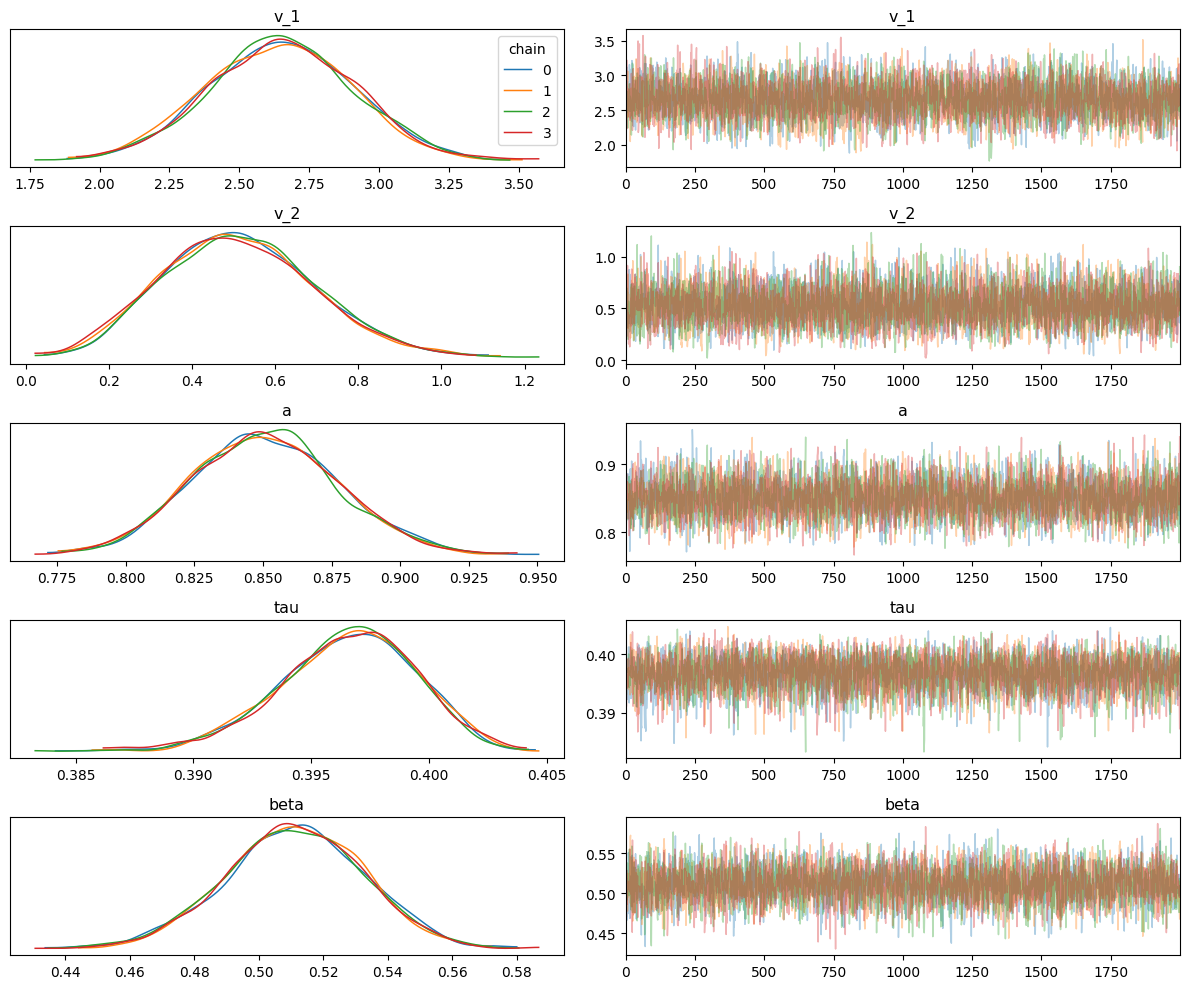

In [7]:
# Traceplots 
f = az.plot_trace(fit, compact=False, legend=True)
plt.tight_layout()

We see here that our chains each give similar results. We also see that our trace plots have well-mixed, random patterns. This indicates convergence.

## Conclusion
The data shows that $v_1 > v_2$. This means that the condition $v_2$ was associated with was the more difficult task. In our case, this means that **condition 2 is the difficult condition**.